In [72]:
# generic imports
import scipy.io
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import h5py

sns.set(style="white", context="talk")
%matplotlib inline

Lets explore the dataset

In [2]:
# create the dataset from matlab file
mat = scipy.io.loadmat('dataset/ARS_DLR_DataSet.mat', squeeze_me=True, struct_as_record=True)
print('Number of keys of the dict element', len(mat.keys()))
print()
print('Keys:')
print(mat.keys())

Number of keys of the dict element 59

Keys:
dict_keys(['__header__', '__version__', '__globals__', 'ARS_Maria_Real_Sitting_Heading_2', 'ARS_Maria_Real_Sitting_Heading_3', 'ARS_Maria_Real_Sitting_Heading_4', 'ARS_Maria_FLGUp1', 'ARS_Maria_FLGUp2', 'ARS_Maria_FLGUp3', 'ARS_Maria_FLGUp4', 'ARS_Maria_Jump', 'ARS_Cristina_Test_4_Sensor_Left', 'ARS_Cristina_Test_5_Sensor_Left', 'ARS_Cristina_Test_2_Sensor_Left', 'ARS_Cristina_Test_3_Sensor_Left', 'ARS_Cristina_Test_1_Sensor_Left', 'ARS_Elena_Test_1_Sensor_Right', 'ARS_Elena_Test_2_Sensor_Right', 'ARS_Elena_Test_3_Sensor_Right', 'ARS_Elena_Test_4_Sensor_Right', 'ARS_Elena_Test_5_Sensor_Right', 'ARS_Elena_Walking', 'ARS_Fabian_Test_1_Sensor_Right', 'ARS_Fabian_Test_2_Sensor_Right', 'ARS_Fabian_Test_3_Sensor_Right', 'ARS_Fabian_Test_4_Sensor_Right', 'ARS_Fabian_Test_5_Sensor_Right', 'ARS_Jesus_Test_1_Sensor_Right', 'ARS_Jesus_Test_2_Sensor_Right', 'ARS_Jesus_Test_3_Inverse_Sensor_Right', 'ARS_Jesus_Test_4_Sensor_Right', 'ARS_Jesus_Test_5_Senso

Lets see what a single entry is composed of

In [3]:
example_entry = mat[list(mat.keys())[3]]
example_entry

array([ array([[  4.53400000e+01,  -9.43000200e+00,   1.97339400e+00, ...,
          4.93577200e-01,  -1.54302400e-01,   3.48073800e-01],
       [  4.53500000e+01,  -9.42630400e+00,   1.96610800e+00, ...,
          4.94766900e-01,  -1.55703100e-01,   3.46810900e-01],
       [  4.53600000e+01,  -9.43360500e+00,   1.96788500e+00, ...,
          4.93788400e-01,  -1.54264800e-01,   3.47441300e-01],
       ..., 
       [  5.26090000e+02,  -8.37665400e+00,   4.48864500e+00, ...,
          4.22742800e-01,  -2.76599000e-01,   4.07902500e-01],
       [  5.26100000e+02,  -8.40929300e+00,   4.50478200e+00, ...,
          4.21581900e-01,  -2.75860100e-01,   4.08134000e-01],
       [  5.26110000e+02,  -8.39455000e+00,   4.49753500e+00, ...,
          4.22797100e-01,  -2.75629300e-01,   4.08713200e-01]]),
       array([[  4.53400000e+01,  -2.38955600e-01,   9.77489600e-02, ...,
          8.65125200e-01,   4.73254700e-01,  -1.66097400e-01],
       [  4.53500000e+01,  -2.38969200e-01,   9.78752400e-02

And a single frame recorded by the IMU sensor is like

In [4]:
example_entry[0][0]

array([  4.53400000e+01,  -9.43000200e+00,   1.97339400e+00,
        -1.57358700e+00,  -5.30050200e-02,   4.51815800e-02,
         3.52342500e-02,   4.93577200e-01,  -1.54302400e-01,
         3.48073800e-01])

And the corresponding attitude

In [5]:
example_entry[1][0]

array([ 45.34      ,  -0.2389556 ,   0.09774896,  -0.966098  ,
        -0.4409745 ,   0.8754856 ,   0.1976519 ,   0.8651252 ,
         0.4732547 ,  -0.1660974 ])

According to the dataset documentation, this is what each column represent:

**`example_entry[0]`**

* 1st column is the time extracted from the sensor in seconds. For example: a value 15.6 means that it has passed 15.6 seconds since the sensor started to transmit data.


* 2nd column is the acceleration in the X axis measured by the sensor.
* 3rd column is the acceleration in the Y axis measured by the sensor.
* 4th column is the acceleration in the Z axis measured by the sensor.


* 5th column is the angular velocity in the X axis measured by the sensor.
* 6th column is the angular velocity in the Y axis measured by the sensor.
* 7th column is the angular velocity in the Z axis measured by the sensor.


* 8th column is the magnetic field in the X axis measured by the sensor.
* 9th column is the magnetic field in the Y axis measured by the sensor.
* 10th column is the magnetic field in the Z axis measured by the sensor.

**`example_entry[1]`**

Contains a matrix of double data with the direction cosine matrix extracted from the sensor.

In [6]:
print(example_entry[2])
print(example_entry[3])

['STNDING' 'SITTING' 'STNDING']
[    1  7743  8388 45040 45929 48078]


**`example_entry[2]`**

It contains a cell array where every position is a string. Every string is the identifier of the activity. The possible values of this strings are:
* 'RUNNING' = "running"
* 'WALKING' = "walking"
* 'WALKUPS' = "walking upstairs"
* 'WALKDWS' = "walking downstairs"
* 'STNDING' = "standing"
* 'SITTING' = "sitting"
* 'XLYINGX' = "lying on the floor"
* 'FALLING' = "falling"
* 'JUMPVRT' = "jumping vertically"
* 'JUMPFWD' = "jumping forward"
* 'JUMPBCK' = "jumping backward"
* 'TRANSIT' = "transition between the activities"

As an example, if the cell contains three strings as: "STNDING RUNNING STNDING" means that the person performed these three activities in this 	order.

**`example_entry[3]`**

It is a vector with the index of the rows that indicate the beginning and ending of an activity. The format is the following:

```
	t1_0 t1_f t2_0 t2_f t3_0 t3_f t4_0 t4_f ... tn_0 tn_f

	ti_0 for i=1...n contains the beginning of the activity i.
	ti_f for i=1...n contains the ending of the activity i.
```

Notice that the length of this vector should be twice the length of the cell containing the strings with the activities.

## From matlab to pandas
Lets convert it to a dataframe for later processing.

We have 3 datasets available: `ARS_DLR_DataSet.mat`, `ARS_DLR_DataSet_V2.mat`, `ARS_DLR_Benchmark_Data_Set.mat`.

In [7]:
# initializations
# renaming activities
activity_map = {
    'RUNNING': 'running',
    'WALKING': 'walking',
    'JUMPING': 'jumping',
    'STNDING': 'standing',
    'SITTING': 'sitting',
    'XLYINGX': 'lying',
    'FALLING': 'falling',
    'TRANSUP': 'TRANS-getting up',
    'TRANSDW': 'TRANS-going down',
    'TRNSACC': 'TRANS-accelerating',
    'TRNSDCC': 'TRANS-deccelerating',
    'TRANSIT': 'TRANS-other',
    'WALKUPS': 'walking upstairs',
    'WALKDWS': 'walking downstairs',
    'JUMPVRT': 'jumping vertically',
    'JUMPFWD': 'jumping forward',
    'JUMPBCK': 'jumping backward'
}

data = {
    'person': [],
    'acc_x': [],
    'acc_y': [],
    'acc_z': [],
    'gyr_x': [],
    'gyr_y': [],
    'gyr_z': [],
    'attitude': [],
    'labels': []
}

datasets = ['ARS_DLR_DataSet.mat', 'ARS_DLR_DataSet_V2.mat', 'ARS_DLR_Benchmark_Data_Set.mat']

In [8]:
for mat in datasets:
    mat = scipy.io.loadmat('dataset/{}'.format(mat), squeeze_me=True, struct_as_record=True)
    keys = [k for k in mat.keys() if k[0] != '_']
    for j, k in enumerate(keys):
        """
        if j < 11:
            continue
        """
        record = mat[k]
        sensor = record[0]
        attitude = record[1]
        # cycle through the labels
        labels = record[2]
        frame_ranges = record[3]
        '''
        print('### DEBUG - {} ###'.format(k))
        print(labels)
        print(frame_ranges)
        '''
        for i in range(0, len(frame_ranges), 2):
            # create current label
            label_index = math.floor(i/2)
            label = labels[label_index]
            label = activity_map[label]
            # +1 because extremes are included
            frame_length = frame_ranges[i+1] - frame_ranges[i] +1
            data['labels'] += [label] * frame_length

            # manually create labels for transitions
            # if subsequent frame_range is not contiguous, create transition
            if (i+2 < len(frame_ranges)) and (frame_ranges[i+2] > frame_ranges[i+1]+1):
                #print('dentro', frame_ranges[i+2], frame_ranges[i+1]+1)
                frame_length = frame_ranges[i+2] - frame_ranges[i+1] -1
                # labeling transitions with current and subsequent actions
                current_action, next_action = (activity_map[labels[label_index]], activity_map[labels[label_index+1]])
                label = 'TRANS-{}-{}'.format(current_action, next_action)
                data['labels'] += [label] * frame_length
            # this below case represent a mislabling error
            elif (i+2 < len(frame_ranges)) and (frame_ranges[i+2] < frame_ranges[i+1]+1):
                print('mislableing error found, length', frame_ranges[i+1]-frame_ranges[i+2], frame_ranges[i+1])
                frame_ranges[i+2] = frame_ranges[i+1]+1
                """
                frame_length = frame_ranges[i+1] - frame_ranges[i+2] -1
                # labeling transitions with current and subsequent actions
                label = labels[label_index]
                data['labels'] += [label] * frame_length
                """

        # sensor[:, 0] indicates time which is not useful, columns 7: are magnetometer, not useful
        # using list instead of numpy concatenation is more efficient
        data['acc_x'] += sensor[:, 1].tolist()
        data['acc_y'] += sensor[:, 2].tolist()
        data['acc_z'] += sensor[:, 3].tolist()
        data['gyr_x'] += sensor[:, 4].tolist()
        data['gyr_y'] += sensor[:, 5].tolist()
        data['gyr_z'] += sensor[:, 6].tolist()

        data['attitude'] += attitude[:, 1:].tolist()

        data['person'] += [k] * len(sensor[:, 1])

        """
        print(j)
        print(len(data['acc_x']))
        print(len(data['labels']))
        print(labels, len(labels))
        print(frame_ranges, len(frame_ranges))
        if j == 11:
            break
        """
    
df = pd.DataFrame(data = data)

mislableing error found, length 88 21920


In [9]:
df.head()

,acc_x,acc_y,acc_z,attitude,gyr_x,gyr_y,gyr_z,labels,person
0,-9.430002,1.973394,-1.573587,"[-0.2389556, 0.09774896, -0.966098, -0.4409745...",-0.053005,0.045182,0.035234,standing,ARS_Maria_Real_Sitting_Heading_2
1,-9.426304,1.966108,-1.573818,"[-0.2389692, 0.09787524, -0.9660817, -0.440980...",-0.055009,0.052240,0.061471,standing,ARS_Maria_Real_Sitting_Heading_2
2,-9.433605,1.967885,-1.577345,"[-0.2387688, 0.09793719, -0.966125, -0.4408015...",-0.034780,0.030520,0.050830,standing,ARS_Maria_Real_Sitting_Heading_2
3,-9.433682,1.956968,-1.603091,"[-0.2389078, 0.09797277, -0.966087, -0.4408588...",-0.060378,0.067733,0.059497,standing,ARS_Maria_Real_Sitting_Heading_2
4,-9.437164,1.944125,-1.599782,"[-0.2390312, 0.0980841, -0.9660453, -0.4409559...",-0.074121,0.052016,0.067737,standing,ARS_Maria_Real_Sitting_Heading_2


In [10]:
df.shape

(2188965, 9)

Lets see the current labels

In [11]:
activity_counts = df['labels'].value_counts()
#activity_counts.loc[~activity_counts.index.str.startswith('TRANS')]
activity_counts

standing                                       724542
walking                                        369227
sitting                                        353225
lying                                          169309
running                                         90294
walking upstairs                                34574
TRANS-standing-falling                          29139
walking downstairs                              29079
jumping                                         28440
TRANS-getting up                                24153
TRANS-lying-falling                             21466
TRANS-standing-walking upstairs                 21149
TRANS-falling-standing                          20582
TRANS-standing-sitting                          19460
TRANS-walking-standing                          16328
TRANS-walking downstairs-standing               14559
TRANS-TRANS-going down-TRANS-getting up         14360
TRANS-standing-running                          14044
TRANS-standing-jumping forwa

Lets merge together some activities:
* jumping forward, jumping, jumping backward, jumping vertically = jumping
* walking upstairs, walking downstairs, walking = walking

And then for an initial analysis lets *not* consider the transition periods

In [12]:
df['labels'] = df['labels'].where(~df['labels'].isin(['jumping forward', 'jumping backward', 'jumping vertically']), 'jumping')
df['labels'] = df['labels'].where(~df['labels'].isin(['walking upstairs', 'walking downstairs']), 'walking')

In [13]:
# check how many transients there are, before removing them from the dataset
trans_count = df.loc[df['labels'].str.startswith('TRANS')].shape[0]
print('There are {} transition frames, at 100Hz they are approx {}min of data'.format(trans_count, round(trans_count/100/60)))

There are 361319 transition frames, at 100Hz they are approx 60min of data


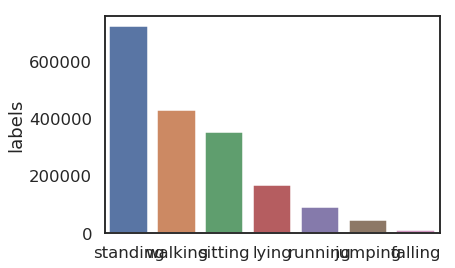

In [14]:
# remove the transients
df = df.loc[~df['labels'].str.startswith('TRANS')]
activity_counts = df['labels'].value_counts()
sns.barplot(x=activity_counts.index, y=activity_counts)

In [15]:
# minutes of each activity
round(activity_counts / 100 / 60)

standing    121.0
walking      72.0
sitting      59.0
lying        28.0
running      15.0
jumping       8.0
falling       2.0
Name: labels, dtype: float64

### Things to test in future
* keep transients
* normalizing sensor values
* data augmentation of underrepresented classes
* test with global frame
* reduce sampling rate to a value lower than 100Hz
* variable frame size?
* framing on person and activity, not only activity

# Framing

In [16]:
def append_zeros(df, stride, window):
    label = df['labels'].iloc[0]
    if df.shape[0] > window:
        print('uno')
        n = math.floor((df.shape[0]-window)/stride) + 1
        remain = stride * n - (df.shape[0] - window)
    else:
        print('due')
        remain = window - df.shape[0]
    print('have to add {} zeros'.format(remain))
    dfb = pd.DataFrame(data = np.zeros((remain, df.shape[1])), columns=df.columns)
    dfb['labels'] = label
    return df.append(dfb)

def framing_range(start, end, stride, window, initialize=False):
    if initialize:
        return 0, start+window
    # updates start and end positions considering stride and window size
    start = end-stride
    end = start+window
    return start, end

In [17]:
window = 128
stride = 64
x = []
y = []
# cycle through each unique activity
activities = df['labels'].unique()
#count = 0
for a in activities:
    print('doing ', a)
    dfa = df.loc[df['labels'] == a]
    # check if padding is needed
    print('shape is', dfa.shape)
    if dfa.shape[0] % stride != 0:
        dfa = append_zeros(dfa, stride, window)
    print('shape after is', dfa.shape)
        
    start, end = framing_range(0, 0, stride, window, initialize=True)
    while end != dfa.shape[0]:
        current = dfa.iloc[start:end]
        data = np.dstack([
            current['acc_x'],
            current['acc_y'],
            current['acc_z'],
            current['gyr_x'],
            current['gyr_y'],
            current['gyr_z']
            ])
        x += data.tolist()
        y += [a] * data.shape[0]
        # update start and end window indexes
        start, end = framing_range(start, end, stride, window)
    
    #count += 1
    #if count == 3:
        #break

doing  standing
shape is (724542, 9)
uno
have to add 2 zeros
shape after is (724544, 9)
doing  sitting
shape is (353225, 9)
uno
have to add 55 zeros
shape after is (353280, 9)
doing  falling
shape is (11902, 9)
uno
have to add 2 zeros
shape after is (11904, 9)
doing  lying
shape is (169309, 9)
uno
have to add 35 zeros
shape after is (169344, 9)
doing  jumping
shape is (45494, 9)
uno
have to add 10 zeros
shape after is (45504, 9)
doing  walking
shape is (432880, 9)
uno
have to add 16 zeros
shape after is (432896, 9)
doing  running
shape is (90294, 9)
uno
have to add 10 zeros
shape after is (90304, 9)


In [18]:
print(np.array(x).shape)
print(len(y), len(x))

(28545, 128, 6)
28545 28545


# Splitting and saving train and test

In [53]:
# One hot encoding of the labels
le = preprocessing.LabelEncoder()
y_int_encoded = le.fit_transform(y)
y_int_encoded = np.array(y_int_encoded).reshape(len(y_int_encoded), 1)
ohe = preprocessing.OneHotEncoder(sparse=False)
y_ohe = ohe.fit_transform(y_int_encoded)
y_ohe.shape

(28545, 7)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), y_ohe,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y_ohe)

In [43]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(22836, 128, 6) (22836, 7)
(5709, 128, 6) (5709, 7)


Just testing that train-test splitting was successful and kept classes distribution

In [44]:
ys = pd.Series(y)
ys.value_counts()/ys.value_counts().sum()

standing    0.396532
walking     0.236889
sitting     0.193309
lying       0.092626
running     0.049361
jumping     0.024838
falling     0.006446
dtype: float64

In [69]:
ys_train = [argmax(t) for t in y_train]
ys_train = pd.Series(ys_train)
ys_train.value_counts()/ys_train.value_counts().sum()

5    0.396523
6    0.236907
4    0.193335
2    0.092617
3    0.049352
1    0.024829
0    0.006437
dtype: float64

In [70]:
ys_test = [argmax(t) for t in y_test]
ys_test = pd.Series(ys_test)
ys_test.value_counts()/ys_test.value_counts().sum()

5    0.396567
6    0.236819
4    0.193204
2    0.092661
3    0.049396
1    0.024873
0    0.006481
dtype: float64

Class proportions are maintained both in test and training

In [77]:
# saving all the files
with h5py.File('train.h5', 'w') as hf:
    hf.create_dataset("x",  data=x_train)
    hf.create_dataset("y",  data=y_train)
with h5py.File('test.h5', 'w') as hf:
    hf.create_dataset("x",  data=x_test)
    hf.create_dataset("y",  data=y_test)

In [78]:
with h5py.File('train.h5', 'r') as hf:
    x = hf['x'][:]
    y = hf['y'][:]
print(y.shape, y_train.shape)
print(x.shape, x_train.shape)

(22836, 7) (22836, 7)
(22836, 128, 6) (22836, 128, 6)
